In [1]:
# env check
import sys
print(sys.version)

3.7.9 (tags/v3.7.9:13c94747c7, Aug 17 2020, 18:58:18) [MSC v.1900 64 bit (AMD64)]


In [2]:
# natural language toolkit
import nltk

nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpal2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dpal2\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# check
import nltk
nltk.word_tokenize("This is a test sentence.")


['This', 'is', 'a', 'test', 'sentence', '.']

In [4]:
import pandas as pd
import numpy as np
import re
import pickle

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer


In [5]:
df = pd.read_csv(
    "reviews.csv",
    sep="\t",
    engine="python",
    on_bad_lines="skip"
)

df.head()



,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,timestamp,IP Address
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,N,Y,Very Happy!,"As advertised. Everything works perfectly, I'm...",2015-08-31,1.440988e+09,193.93.167.87
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,N,Y,five star,it's great,2015-08-31,1.441002e+09,193.93.167.87
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,N,Y,great cables,These work great and fit my life proof case fo...,2015-08-31,1.440959e+09,193.93.167.87
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,N,Y,Work very well,Work very well,2015-08-31,1.441015e+09,193.93.167.87
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,N,Y,Cameras has battery issues,"Be careful with these products, I have bought ...",2015-08-31,1.440973e+09,205.10.168.66


In [6]:
df.columns

Index(['marketplace', 'customer_id', 'review_id', 'product_id',
       'product_parent', 'product_title', 'product_category', 'star_rating',
       'helpful_votes', 'total_votes', 'vine', 'verified_purchase',
       'review_headline', 'review_body', 'review_date', 'timestamp',
       'IP Address'],
      dtype='object')

In [7]:
# creating df of reviews
df["review"] = (
    df["review_headline"].fillna("") + " " +
    df["review_body"].fillna("")
)

df[["review_headline", "review_body", "review"]].head()


,review_headline,review_body,review
0,Very Happy!,"As advertised. Everything works perfectly, I'm...",Very Happy! As advertised. Everything works pe...
1,five star,it's great,five star it's great
2,great cables,These work great and fit my life proof case fo...,great cables These work great and fit my life ...
3,Work very well,Work very well,Work very well Work very well
4,Cameras has battery issues,"Be careful with these products, I have bought ...",Cameras has battery issues Be careful with the...


In [8]:
# preprocess data
import nltk
import re
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-z\s]", "", text)
    text = re.sub(r"\s+", " ", text)

    words = nltk.word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]

    return " ".join(words)


In [9]:
# apply preprocess rules, get clean data
df["cleaned_review"] = df["review"].apply(preprocess_text)
df[["review", "cleaned_review"]].head()

,review,cleaned_review
0,Very Happy! As advertised. Everything works pe...,very happy a advertised everything work perfec...
1,five star it's great,five star it great
2,great cables These work great and fit my life ...,great cable these work great and fit my life p...
3,Work very well Work very well,work very well work very well
4,Cameras has battery issues Be careful with the...,camera ha battery issue be careful with these ...


In [10]:
# load TF-IDF model
import pickle

with open("TfidfModel.pickle", "rb") as f:
    tfidfModel = pickle.load(f)

c:\Coding\Major Project\Fake-Product-Review-Monitoring-master\.venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
c:\Coding\Major Project\Fake-Product-Review-Monitoring-master\.venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [11]:
# load classifier model
with open("classifier.pickle", "rb") as f:
    classifierModel = pickle.load(f)

c:\Coding\Major Project\Fake-Product-Review-Monitoring-master\.venv\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\Coding\Major Project\Fake-Product-Review-Monitoring-master\.venv\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.19.1 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [12]:
# transforming reviews into feature vectors

X_tfidf = tfidfModel.transform(df["cleaned_review"])
X_tfidf.shape

# expected output: (number_of_reviews, number_of_features) => vectorisation is successful

(88578, 2000)

In [13]:
# ↓ ___________________________________________________________________________________________________________________________________ ↓
# import LSA tools
from sklearn.decomposition import TruncatedSVD

In [14]:
# create the LSA (SVD) model

# Number of latent semantic dimensions
# 100 is a common, safe starting value
n_components = 100

lsa_model = TruncatedSVD(
    n_components=n_components,
    random_state=42
)

# '''
# What this means:

#     - Each review will now be represented by 100 semantic numbers

#     - These numbers capture topics / concepts, not words

#     - This is dimensionality reduction:

#         - TF-IDF → thousands of dimensions

#         - LSA → 100 dimensions

# Why 100?

#     - Not too small (loses meaning)

#     - Not too large (noisy)

#     - Industry-standard default
# '''


In [15]:
# apply LSA to your TF-IDF matrix
X_lsa = lsa_model.fit_transform(X_tfidf)

X_lsa.shape

# expected output: (number_of_reviews, 100) => LSA is working, Each review now has a semantic vector

# '''
# - .fit_transform() is allowed here

# Why?
# - LSA is unsupervised
# - We are analyzing the dataset, not predicting labels
# - This does NOT affect your classifier

# '''


(88578, 100)

In [16]:
# Attach LSA vectors to your DataFrame
lsa_columns = [f"lsa_{i}" for i in range(n_components)]

lsa_df = pd.DataFrame(
    X_lsa,
    columns=lsa_columns,
    index=df.index
)

df_lsa = pd.concat([df, lsa_df], axis=1)

df_lsa.head()

# '''
# What this does:

#     - Converts LSA vectors into readable columns
#     - Attaches them to your original reviews
#     - You now have semantic features per review

# What to expect:
#     - A DataFrame with many new columns:   lsa_0, lsa_1, lsa_2, …
#     - Each row = one review’s semantic fingerprint
# '''

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,...,lsa_90,lsa_91,lsa_92,lsa_93,lsa_94,lsa_95,lsa_96,lsa_97,lsa_98,lsa_99
0,US,20422322,R8MEA6IGAHO0B,B00MC4CED8,82850235,BlackVue DR600GW-PMP,Mobile_Electronics,5,0.0,0.0,...,-0.026265,0.003930,0.015295,-0.018044,-0.022343,0.004818,0.043035,0.035893,-0.048024,-0.006661
1,US,40835037,R31LOQ8JGLPRLK,B00OQMFG1Q,82850235,GENSSI GSM / GPS Two Way Smart Phone Car Alarm...,Mobile_Electronics,5,0.0,1.0,...,-0.003037,-0.003698,0.000810,0.002876,-0.001347,-0.001217,-0.000587,-0.000574,0.000861,-0.000796
2,US,51469641,R2Y0MM9YE6OP3P,B00QERR5CY,82850235,iXCC Multi pack Lightning cable,Mobile_Electronics,5,0.0,0.0,...,-0.006321,0.004488,0.003885,0.004785,-0.000427,-0.001422,-0.000161,-0.003817,0.001434,0.000949
3,US,4332923,RRB9C05HDOD4O,B00QUFTPV4,82850235,abcGoodefg® FBI Covert Acoustic Tube Earpiece ...,Mobile_Electronics,4,0.0,0.0,...,-0.007928,0.011691,-0.012647,-0.010748,0.005083,-0.008585,-0.008952,-0.018894,-0.009944,0.000232
4,US,44855305,R26I2RI1GFV8QG,B0067XVNTG,563475445,Generic Car Dashboard Video Camera Vehicle Vid...,Mobile_Electronics,2,0.0,0.0,...,-0.015828,-0.040790,0.008846,0.044780,0.007906,0.035895,0.090427,0.021286,-0.024026,-0.048814


In [17]:
# Product-level semantic aggregation (This is where LSA becomes useful.)
# Group reviews by product and compute average semantic vector

product_lsa = (
    df_lsa
    .groupby("product_id")[lsa_columns]
    .mean()
)

product_lsa.head()

# '''
# What this means (important):
#     - Each product now has a semantic profile
#     - You can compare products based on review meaning, not just sentiment
#     - Fake reviews often create unnatural semantic clustering

#     - This is something classification alone cannot do.
# '''


,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,lsa_5,lsa_6,lsa_7,lsa_8,lsa_9,...,lsa_90,lsa_91,lsa_92,lsa_93,lsa_94,lsa_95,lsa_96,lsa_97,lsa_98,lsa_99
product_id,,,,,,,,,,,,,,,,,,,,,
089933623X,0.320776,-0.081578,-0.076555,-0.250340,0.117764,0.059298,0.088610,-0.057129,-0.027966,0.107793,...,-0.011722,0.001250,0.007911,-0.051145,-0.016734,0.003740,-0.016203,0.027698,-0.005269,-0.005036
1084814315,0.159316,0.009864,0.012880,-0.060497,-0.024814,-0.019894,0.016434,-0.104442,0.009139,-0.028402,...,-0.003549,0.009958,0.009040,0.013977,-0.003191,0.022162,-0.011656,-0.007453,0.007569,-0.010293
1085901386,0.033962,-0.013843,-0.007483,-0.008348,-0.003885,-0.004233,-0.015990,-0.001793,0.003402,0.016859,...,0.020702,0.014634,0.002275,-0.014752,-0.001780,0.009036,0.016485,-0.011806,-0.027096,-0.003577
1400532663,0.109414,-0.045049,-0.026903,-0.079505,-0.055711,-0.061039,-0.122633,-0.015380,-0.015020,0.138631,...,0.005120,-0.005220,-0.003705,-0.006984,-0.017550,-0.016216,0.001902,-0.001225,-0.006715,0.018195
1400532736,0.165186,-0.013190,-0.017664,-0.041571,-0.016716,-0.014233,-0.020385,-0.003560,0.016930,0.068788,...,0.004669,-0.007726,-0.012464,-0.028313,-0.003012,0.020057,-0.014260,-0.005988,0.012423,0.024607


In [18]:
# Semantic similarity between products

from sklearn.metrics.pairwise import cosine_similarity

product_similarity = cosine_similarity(product_lsa)

product_similarity_df = pd.DataFrame(
    product_similarity,
    index=product_lsa.index,
    columns=product_lsa.index
)

product_similarity_df.head()

# '''
# What this gives you:

#     - A similarity score between every pair of products
#     - Values range from:
#         - 1.0 → very similar reviews
#         - 0.0 → unrelated
#         - < 0 → opposite semantics

# This enables:
#     - Fake-review pattern detection
#     - Product clustering
#     - Anomaly detection
# '''

product_id,089933623X,1084814315,1085901386,1400532663,1400532736,1427695024,1597751383,1616831022,1897225970,2409862403,...,B012GUX7JW,B012HC7C5O,B012HXTM2O,B01317VU1G,B0131M7TKM,B0131NRA9Q,B013AJYRCY,B013OGQME4,B01416742A,B01HSW9NCS
product_id,,,,,,,,,,,,,,,,,,,,,
089933623X,1.000000,0.192755,0.011786,0.168974,0.299691,0.167172,0.082362,0.254850,0.000026,0.069855,...,0.063139,0.016369,0.119102,0.011441,0.162062,0.149423,0.090268,0.211807,0.177392,-0.002069
1084814315,0.192755,1.000000,0.020963,0.097629,0.412408,0.102908,0.127938,0.284924,0.228050,0.268274,...,0.140524,0.130203,0.155072,0.148251,0.378951,0.215815,0.185209,0.256635,0.109959,0.188811
1085901386,0.011786,0.020963,1.000000,0.015178,0.070550,0.055573,0.001701,0.015762,-0.001363,0.404394,...,0.015786,0.009456,0.001032,0.002612,0.025327,0.019582,0.018978,0.035365,0.024767,0.002485
1400532663,0.168974,0.097629,0.015178,1.000000,0.306609,0.298180,0.481512,0.042360,0.235505,0.051161,...,0.015219,0.018693,0.038661,0.031822,0.243043,0.130764,0.069229,0.280670,0.023270,0.062983
1400532736,0.299691,0.412408,0.070550,0.306609,1.000000,0.493506,0.307308,0.397935,0.155624,0.249102,...,0.089087,0.142131,0.219745,0.243393,0.347716,0.382437,0.321346,0.474563,0.155952,0.285853


In [19]:
# save LSA enhanced Outputs

df_lsa.to_csv("final_review_predictions_with_lsa.csv", index=False)

# ↑ ___________________________________________________________________________________________________________________________________ ↑


In [20]:
# generate predictions
predictions = classifierModel.predict(X_tfidf)
df["prediction"] = predictions

df[["review", "prediction"]].head()

,review,prediction
0,Very Happy! As advertised. Everything works pe...,1
1,five star it's great,1
2,great cables These work great and fit my life ...,1
3,Work very well Work very well,1
4,Cameras has battery issues Be careful with the...,0


In [21]:
# formatting
df["prediction_label"] = df["prediction"].map({
    0: "Genuine Review",
    1: "Fake Review"
})

df[["review", "prediction_label"]].head()

,review,prediction_label
0,Very Happy! As advertised. Everything works pe...,Fake Review
1,five star it's great,Fake Review
2,great cables These work great and fit my life ...,Fake Review
3,Work very well Work very well,Fake Review
4,Cameras has battery issues Be careful with the...,Genuine Review


In [22]:
df["prediction_label"].value_counts()

Fake Review       54051
Genuine Review    34527
Name: prediction_label, dtype: int64

In [23]:
# save results
df[[
    "review_headline",
    "review_body",
    "prediction_label"
]].to_csv("final_review_predictions.csv", index=False)


In [24]:
# ↓↓ ____________________________________ UI Output Requirements Calculation ____________________________________ ↓↓

## Prediction confidence (probability)
prediction_proba = classifierModel.predict_proba(X_tfidf)

# Take max probability as confidence
df["confidence"] = prediction_proba.max(axis=1)
df[["prediction_label", "confidence"]].head()



,prediction_label,confidence
0,Fake Review,0.650095
1,Fake Review,0.629449
2,Fake Review,0.731827
3,Fake Review,0.643988
4,Genuine Review,0.501460


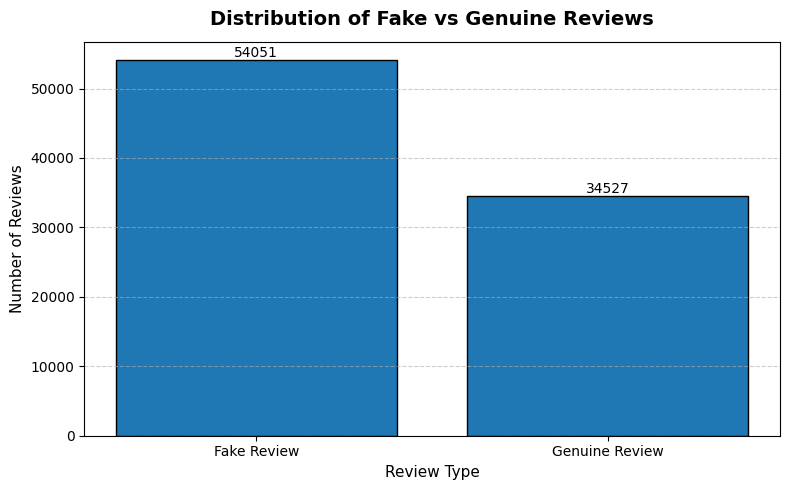

In [25]:
# chart for review purpose only
import matplotlib.pyplot as plt

counts = df["prediction_label"].value_counts()

plt.figure(figsize=(8, 5))

bars = plt.bar(
    counts.index,
    counts.values,
    edgecolor="black",
    linewidth=1
)

plt.title("Distribution of Fake vs Genuine Reviews", fontsize=14, fontweight="bold", pad=12)
plt.xlabel("Review Type", fontsize=11)
plt.ylabel("Number of Reviews", fontsize=11)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height}",
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()
